In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import random
def print_np(x):
    print ("Type is %s" % (type(x)))
    print ("Shape is %s" % (x.shape,))
#     print ("Values are: \n%s" % (x))

In [15]:
import sys
# sys.path.append('../')
sys.path.append('../')
sys.path.append('../model')
sys.path.append('../cost')
sys.path.append('../constraints')
import UnicycleModel
import UnicycleCost
import UnicycleConstraints
from scipy.integrate import solve_ivp
from Scvx import Scvx

In [20]:
ix = 3
iu = 2
ih = 2
N = 100
delT = 0.1
max_iter = 100

In [21]:
xi = np.zeros(3)
xi[0] = -2.0
xi[1] = -2.0 
xi[2] = np.pi/2

xf = np.zeros(3)
xf[0] = 2.0
xf[1] = 2.0
xf[2] = 0

myModel = UnicycleModel.unicycle('Hello',ix,iu,delT)
myCost = UnicycleCost.unicycle('Hello',ix,iu,N)
myConst = UnicycleConstraints.UnicycleConstraints('Hello',ix,iu,ih)

x0 = np.zeros((N+1,ix))
for i in range(N+1) :
    x0[i] = (N-i)/N * xi + i/N * xf
# u0 = np.random.rand(N,iu)
u0 = np.zeros((N,iu))

In [22]:
i1 = Scvx('unicycle',N,max_iter,myModel,myCost,myConst)
x, u = i1.update(x0,u0)

iteration   cost        cost_vc   cost_tr   reduction    expected    radius_tr
0           0           3e+05       0           3e+05       3e+05       1.0         
Boundary conditions are not satisified: just accept this step
1           208         1.35e-05    77.8        91          91          2.0         
Boundary conditions are not satisified: just accept this step
non-positive expected reduction: should not occur
2           186         1.68e-06    8.84        -0.539      -0.539      4.0         
non-positive expected reduction: should not occur
3           193         1.01e-06    1.88        -0.186      -0.186      2.0         
4           195         1.25e-05    0.425       0.366       0.366       1.0         
5           195         0.000592    0.00817     0.00817     0.00817     2.0         
6           195         0.000589    1.09e-08    0.00109     0.00109     4.0         
7           195         4.58e-05    0.00918     0.0412      0.0412      8.0         
8           195  

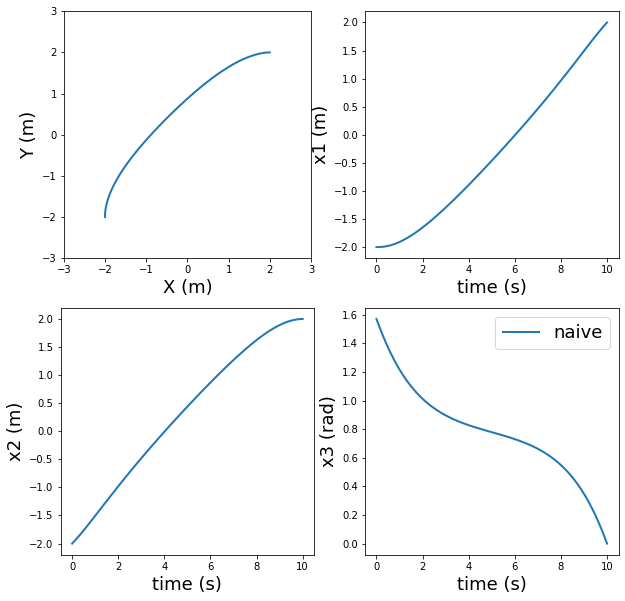

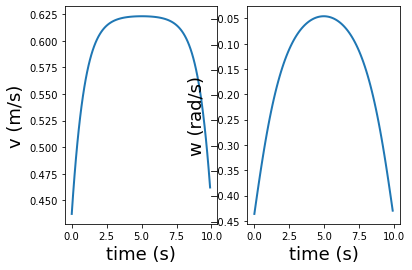

In [23]:
plt.figure(figsize=(10,10))
fS = 18
plt.subplot(221)
plt.plot(x[:,0], x[:,1], linewidth=2.0)
# plt.plot(x_t[0],x_t[1],"o",label='goal')
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-3, 3, -3, 3])
plt.xlabel('X (m)', fontsize = fS)
plt.ylabel('Y (m)', fontsize = fS)
plt.subplot(222)
plt.plot(np.array(range(N+1))*0.1, x[:,0], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x1 (m)', fontsize = fS)
plt.subplot(223)
plt.plot(np.array(range(N+1))*0.1, x[:,1], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x2 (m)', fontsize = fS)
plt.subplot(224)
plt.plot(np.array(range(N+1))*0.1, x[:,2], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x3 (rad)', fontsize = fS)
plt.legend(fontsize=fS)
plt.show()

plt.figure()
plt.subplot(121)
plt.plot(np.array(range(N))*0.1, u[:,0], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('v (m/s)', fontsize = fS)
plt.subplot(122)
plt.plot(np.array(range(N))*0.1, u[:,1], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('w (rad/s)', fontsize = fS)
plt.show()

In [ ]:
a = np.vstack((np.ones((10,2)),np.zeros(2)))
print_np(a)